In [1]:
%pylab inline
%pdb
import pandas as pd
from datetime import datetime as dt
import os
import glob
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib
Automatic pdb calling has been turned ON


In [65]:
fname = "./data/date-hour-soo-dest-2015.csv"
bart_df = pd.read_csv(fname, names = ["Date", "Hour", "Origin", "Destination", "Count"],
                     parse_dates = ["Date"], index_col = "Date" )


In [108]:
#hour_df = bart_df.groupby("Hour")
#hour_df["Count"].mean().plot(kind="bar")
#piv = bart_df.pivot_table(index=bart_df.index.dayofweek, values="Count", aggfunc=np.sum, columns="Hour")
#piv/sum(piv)
#resamp = bart_df.resample("d").mean()
#resamp.dropna(how="any", inplace=True)
#resamp = resamp["Count"]
#resamp = resamp.diff().dropna()
#sm.graphics.tsa.plot_acf(resamp, lags=30)
#resamp
#pd.tools.plotting.autocorrelation_plot(resamp["Count"],)
#resamp
bart_df["weekday"].values[-20:-10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [109]:
piv.index = ["m", "t", "w", "tr", "f","s","su"]
piv = piv[piv["Hour"] < 10]
(piv.T/sum(piv.T)).plot(kind="bar")

KeyError: 'Hour'

> /Users/ahoffer/Projects/git/bart/pandas/index.pyx(161)pandas.index.IndexEngine.get_loc (pandas/index.c:4084)()

ipdb> q


In [94]:
t = bart_df.apply(lambda row: row["Hour"]+1, axis = 1 )

In [110]:
t.head()

Date
2015-01-01    1
2015-01-01    1
2015-01-01    1
2015-01-01    1
2015-01-01    1
dtype: int64

/Users/ahoffer/.virtualenvs/test/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x1188b46d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11baef590>,
 'fliers': [<matplotlib.lines.Line2D at 0x11baf9890>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11baf9250>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11c19ba90>,
  <matplotlib.lines.Line2D at 0x11d3ef7d0>]}

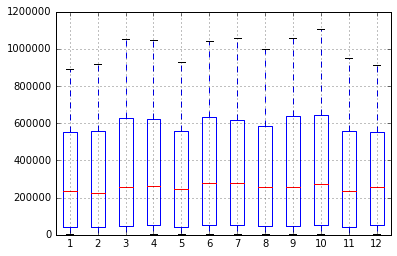

In [111]:
bart_df["weekday"] = bart_df.index.dayofweek 
weekday_filter = bart_df["weekday"] < 5
hour_filter = bart_df["Hour"] < 12
bart_df = bart_df[weekday_filter & hour_filter  & (bart_df["Count"] > 5)]
#mon = bart_df.resample("M", how=np.mean)
weekdays = ["Mon", "Tues", "Wed", "Thurs", "Fri"]
bart_df["weekday"].unique = weekdays
mon = bart_df.pivot_table(aggfunc=np.sum, index="Hour", columns=bart_df.index.month, values="Count")
mon = mon.dropna(axis=0, how="any")
#mon = mon/sum(mon)
#mon = bart_df.groupby("Origin")
#mon["Count"].mean().plot(kind = "bar")
mon.boxplot()

In [3]:
csv_files = glob.glob("./data/*.csv")
my_list = []
for f_name in csv_files:
    with open(f_name, 'r') as f:
        f.read()
        my_list.append()

TypeError: append() takes exactly one argument (0 given)

> <ipython-input-3-2299e2a913d5>(6)<module>()
      2 my_list = []
      3 for f_name in csv_files:
      4     with open(f_name, 'r') as f:
      5         f.read()
----> 6         my_list.append()

ipdb> 
ipdb> q


In [4]:
bart_df = bart_df[(bart_df["Count"] > 2) & (bart_df["Hour"] > 6) & (bart_df["Hour"] < 10)]

In [113]:
bart_df["DateTime"] = bart_df.apply(lambda row: dt.strptime(row["Date"], "%Y-%m-%d") , axis=1)
bart_df["DayOfWeek"] = bart_df.apply(lambda row: datetime.date.weekday(row["DateTime"]), axis=1)

KeyError: ('Date', u'occurred at index 2015-01-01 00:00:00')

> /Users/ahoffer/.virtualenvs/test/lib/python2.7/site-packages/pandas/indexes/base.py(1994)get_value()
   1992                     raise InvalidIndexError(key)
   1993                 else:
-> 1994                     raise e1
   1995             except Exception:  # pragma: no cover
   1996                 raise e1

ipdb> q


In [112]:
daily_df = bart_df[(bart_df["DayOfWeek"] < 5)].groupby("Date")
hourly_df = bart_df[(bart_df["Hour"] > 6) & (bart_df["Hour"] < 10) 
                   & (bart_df["DayOfWeek"]) > 0 & (bart_df["DayOfWeek"] < 6)].groupby("Hour")

KeyError: 'DayOfWeek'

> /Users/ahoffer/Projects/git/bart/pandas/hashtable.pyx(683)pandas.hashtable.PyObjectHashTable.get_item (pandas/hashtable.c:12322)()

ipdb> q


In [26]:
bart_df_pivot = bart_df.head(10000).pivot_table(values="Count", index="Origin", columns="Destination")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e5ecc90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12054a110>]], dtype=object)

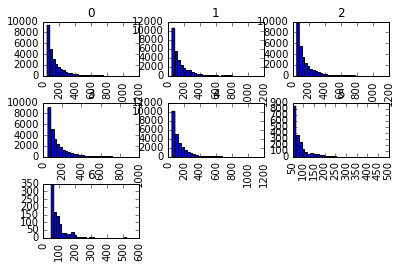

In [61]:
bart_df[bart_df["Count"] > 50].hist(column="Count", by="DayOfWeek", bins=30)

In [69]:
a = sm.OLS(bart_df.head(10000)["DayOfWeek"], bart_df.head(10000)["Count"])
res = a.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DayOfWeek   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     374.6
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           5.74e-82
Time:                        23:29:36   Log-Likelihood:                -26596.
No. Observations:               10000   AIC:                         5.319e+04
Df Residuals:                    9999   BIC:                         5.320e+04
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Count          0.0128      0.001     19.355      0.000         0.012     0.014
==============================================================================
Omnibus:                      602.844   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.527
Skew:                          -0.376   Prob(JB):                     3.91e-88
Kurtosis:                       2.366   Cond. No.                         1.00
==============================================================================
"""

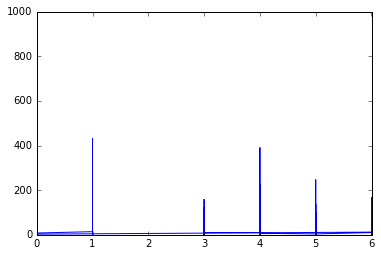

In [68]:
plot(bart_df.head(10000)["DayOfWeek"], bart_df.head(10000)["Count"])

In [81]:
bart_df[0:1000][["DateTime","Count"]].set_index("DateTime").rolling(window=10).mean()

,Count
DateTime,
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN
2015-01-01,NaN


In [ ]:
rm.plot()